# eCommerce Data Analysis - Exploratory Data Analysis

This notebook contains the exploratory data analysis of the eCommerce transaction dataset.

In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('default')
%matplotlib inline

## 1. Data Loading and Initial Inspection

In [16]:
# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Display info about each dataset
print("\nCustomers Dataset Info:")
customers_df.info()
print("\nProducts Dataset Info:")
products_df.info()
print("\nTransactions Dataset Info:")
transactions_df.info()


Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

## 2. Data Cleaning and Preprocessing

In [10]:
# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Check for missing values
print("\nMissing values in Customers:")
print(customers_df.isnull().sum())
print("\nMissing values in Products:")
print(products_df.isnull().sum())
print("\nMissing values in Transactions:")
print(transactions_df.isnull().sum())


Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## 3. Customer Analysis

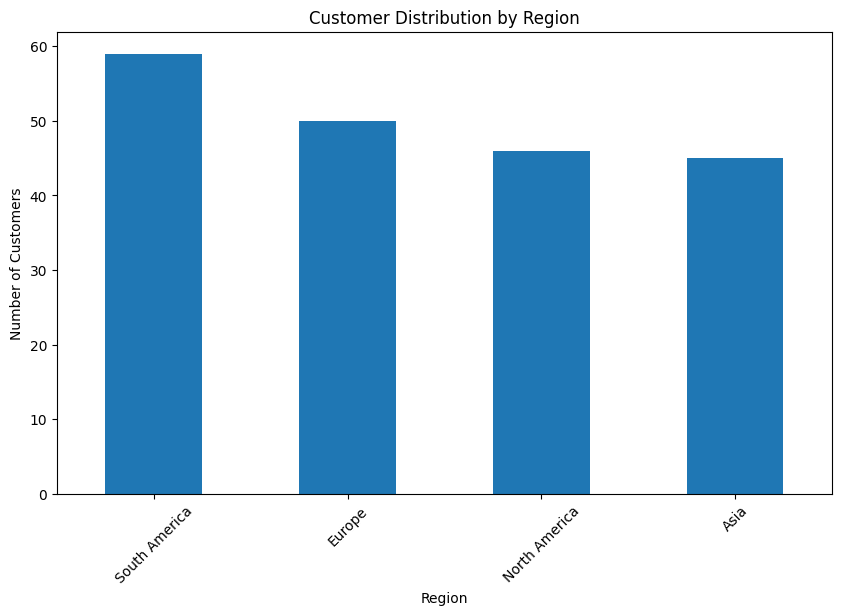

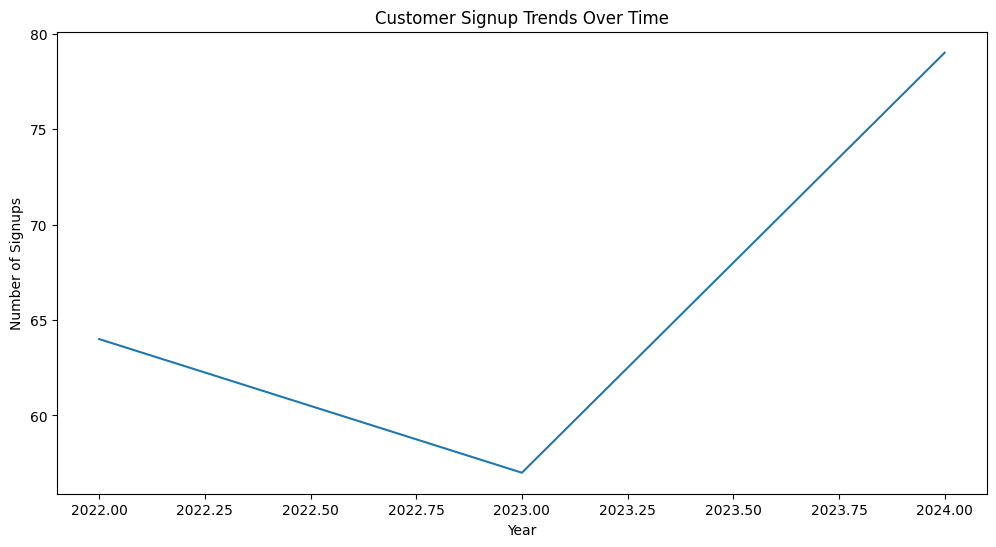

In [11]:
# Customer distribution by region
plt.figure(figsize=(10, 6))
customers_df['Region'].value_counts().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Customer signup trends over time
plt.figure(figsize=(12, 6))
customers_df['SignupDate'].dt.year.value_counts().sort_index().plot(kind='line')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

## 4. Product Analysis

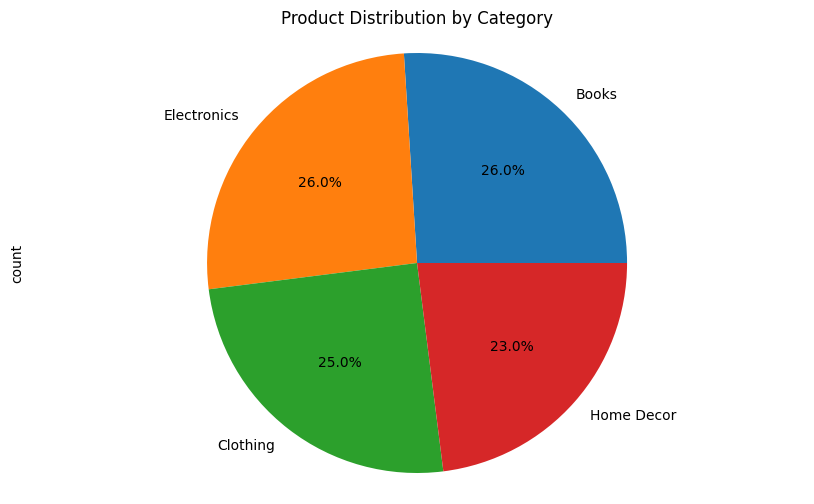

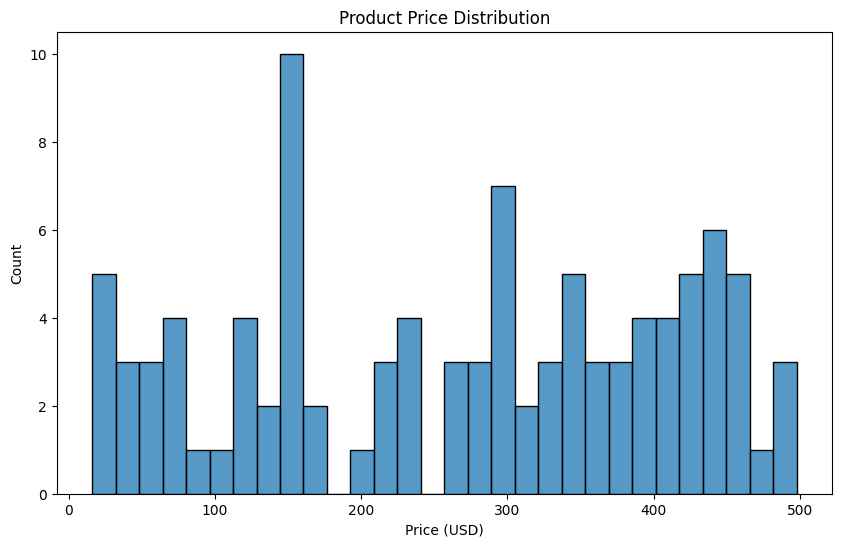

In [12]:
# Product distribution by category
plt.figure(figsize=(10, 6))
products_df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Distribution by Category')
plt.axis('equal')
plt.show()

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=products_df, x='Price', bins=30)
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.show()

## 5. Transaction Analysis

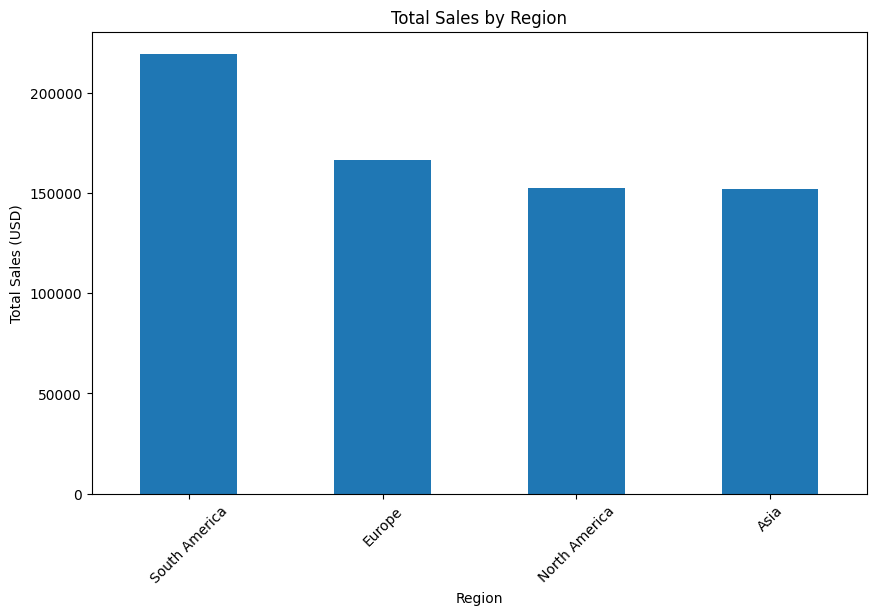

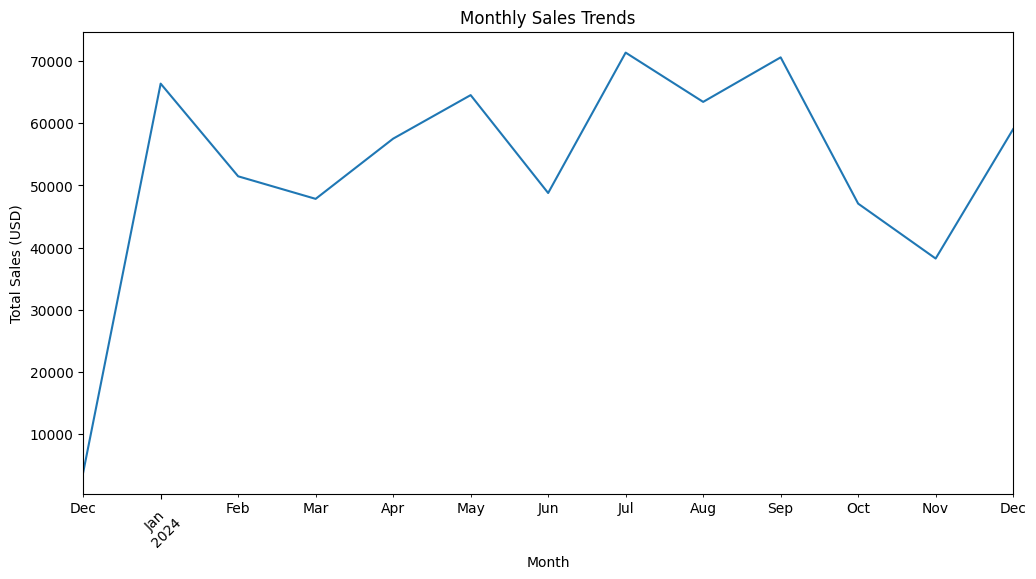

In [13]:
# Merge transactions with products and customers
full_transactions = transactions_df.merge(products_df, on='ProductID').merge(customers_df, on='CustomerID')

# Transaction value by region
region_sales = full_transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

# Sales trends over time
monthly_sales = full_transactions.groupby(full_transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

## 6. Key Business Insights

1. Customer Demographics and Growth:
   - Analyze customer distribution by region
   - Study customer acquisition trends

2. Product Performance:
   - Identify top-selling categories
   - Analyze price distribution and its impact on sales

3. Sales Patterns:
   - Examine seasonal trends
   - Study regional performance

4. Customer Behavior:
   - Analyze purchase frequency
   - Study average transaction values

5. Market Opportunities:
   - Identify underserved regions
   - Spot potential growth categories